# Оглавление

<a href='#1'>Часть 1. Знакомство с данными</a>
* <a href='#1.1'>1.1 Общая информация по данным, предобработка </a>

<a href='#2'>Часть 2. Анализ данных</a>
* <a href='#2.1'>2.1 Соотношение видов объектов общественного питания по количеству </a>
* <a href='#2.2'>2.2 Соотношение сетевых и несетевых заведений по количеству </a>
* <a href='#2.3'>2.3 Для какого вида объекта общественного питания характерно сетевое распространение </a>
* <a href='#2.4'>2.4 Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест </a>
* <a href='#2.5'>2.5 Среднее количество посадочных мест для каждого вида объекта общественного питания </a>
* <a href='#2.6'>2.6 Отдельный столбец с информацией об улице из столбца address </a>
* <a href='#2.7'>2.7 Топ-10 улиц по количеству объектов общественного питания </a>
* <a href='#2.8'>2.8 Число улиц с одним объектом общественного питания </a>
* <a href='#2.9'>2.9 Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания</a>
* <a href='#2.10'> Общий вывод</a>

<a href='#3'>Часть 3. Презентация</a>

In [30]:
!pip install plotly

In [31]:
#Импорт библиотек

import pandas as pd #для описания и анализа данных
import matplotlib.pyplot as plt #для работы с графиками
#магия, чтобы график был сразу после выполнения кода
%matplotlib inline 
import plotly.express as px #для работы с графиками
import numpy as np #для эффективной работы с вычислениями и большими массивами

<a id='1'></a>
# Часть 1. Знакомство с данными

<a id='1.1'></a>
## 1.1 Общая информация по данным, предобработка

In [32]:
#Открываем данные таблицы rest_data
df = pd.read_csv('rest_data.csv')

In [33]:
#Приведем названия столбцов к нижнему регистру для дальнейшей комфортной работы
df.columns = df.columns.str.lower()
df

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


***Описание данных***

* **id** — идентификатор объекта;
* **object_name** — название объекта общественного питания;
* **chain** — сетевой ресторан;
* **object_type** — тип объекта общественного питания;
* **address** — адрес;
* **number** — количество посадочных мест.

#### **Изучим общую информацию по таблице**

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 480.2+ KB


#### **Проверим на пропуски и дубликаты**

In [35]:
display(df.isna().sum())
display(df.duplicated().sum())

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

0

In [36]:
#Проверим на дубликаты, удалив столбец id
df_drop = df.drop(['id'], axis=1) 
display(df_drop)
display(df_drop.duplicated().sum())

,object_name,chain,object_type,address,number
0,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...
15361,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


82

In [37]:
#Удаляем дубликаты
df_drop = df_drop.drop_duplicates().reset_index(drop = False)
df_id = df[['id']]

#Таблица без дубликатов
df = df_id.merge(df_drop, how='right', left_index=True, right_on = 'index')
df = df.drop(['index'], axis=1) 
df

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15279,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15280,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15281,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15282,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


Данные чистые, тип данных верный по смысловой нагрузке, можем переходить ко 2 части работы.

<a id='2'></a>
# Часть 2. Анализ данных

<a id='2.1'></a>
## 2.1 Соотношение видов объектов общественного питания по количеству

In [38]:
# Сгруппируем данные по видам общ. питения
df_type = df.groupby('object_type').agg({'id':'count', 'number':'mean'}).sort_values(by='id', ascending=False).reset_index().round()

#Построим график
fig = px.bar(df_type, x='id', y='object_type',orientation='h', title='Соотношение видов объектов общественного питания по количеству',  color='object_type')
fig.update_xaxes(title_text="Количество объектов общественного питания, ед")
fig.update_layout(yaxis_title="Тип общественного питания")
fig.update_layout(showlegend = False)


Больше всего в Москве кафе -  11995 ед., все остальные типы общественного питания значительно уступают в количестве. На втором месте рестораны - 4589 ед., а на третьем месте столовые - около 4569 ед.

<a id='2.2'></a>
## 2.2 Соотношение сетевых и несетевых заведений по количеству

In [39]:
from plotly import graph_objects as go

name_rest = df['chain']
values = df['id']

fig = go.Figure(data=[go.Pie(labels=name_rest, values=values)])
fig.show()

В большистве своем заведения общественного питания имеют несетевой тип, всего 21% всех заведений общепита - это сеть.

<a id='2.3'></a>
## 2.3 Для какого вида объекта общественного питания характерно сетевое распространение

In [40]:
df_chain = df[df['chain'] == 'да']
df_chain_type = df_chain.groupby('object_type').agg({'id':'count', 'number':'mean'}).sort_values(by='id', ascending=False).reset_index().round()
df_chain_type

,object_type,id,number
0,кафе,1396,47.0
1,предприятие быстрого обслуживания,788,40.0
2,ресторан,543,100.0
3,магазин (отдел кулинарии),78,9.0
4,закусочная,56,14.0
5,кафетерий,52,12.0
6,бар,37,53.0
7,буфет,11,13.0
8,столовая,3,112.0


In [41]:
df_chain_type_per = df_chain_type.merge(df_type, left_on='object_type', right_on='object_type', how='left')
df_chain_type_per['Share'] = (df_chain_type_per['id_x'] / df_chain_type_per['id_y']*100).round()
df_chain_type_per = df_chain_type_per.sort_values(by='Share', ascending=False)
df_chain_type_per

,object_type,id_x,number_x,id_y,number_y,Share
1,предприятие быстрого обслуживания,788,40.0,1898,21.0,42.0
3,магазин (отдел кулинарии),78,9.0,273,6.0,29.0
2,ресторан,543,100.0,2282,97.0,24.0
0,кафе,1396,47.0,6071,40.0,23.0
4,закусочная,56,14.0,349,8.0,16.0
5,кафетерий,52,12.0,395,9.0,13.0
6,бар,37,53.0,855,44.0,4.0
7,буфет,11,13.0,577,52.0,2.0
8,столовая,3,112.0,2584,130.0,0.0


In [42]:
fig = px.bar(df_chain_type_per, x='Share', y='object_type',orientation='h', title='Доля сетевых заведений для каждого типа общ. питания', color='object_type')
fig.update_xaxes(title_text='Доля сетевых заведений, %')
fig.update_layout(yaxis_title="Тип общественного питания")
fig.update_layout(showlegend = False)

Чаще всего сетью становятся предприятия быстрого обслуживания - 42% от общего числа заведений такого типа, отделы кулинарии в магазинах - 29% и рестораны - 24%, кафе на четвертом месте - 23%.

<a id='2.4'></a>
## 2.4 Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест

In [43]:
df_chain_type

,object_type,id,number
0,кафе,1396,47.0
1,предприятие быстрого обслуживания,788,40.0
2,ресторан,543,100.0
3,магазин (отдел кулинарии),78,9.0
4,закусочная,56,14.0
5,кафетерий,52,12.0
6,бар,37,53.0
7,буфет,11,13.0
8,столовая,3,112.0


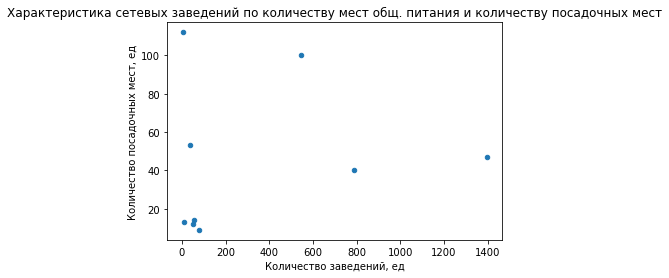

In [44]:
#Построим график
df_chain_type.plot(x='id', y='number', kind='scatter', title='Характеристика сетевых заведений по количеству мест общ. питания и количеству посадочных мест')
plt.xlabel('Количество заведений, ед')
plt.ylabel('Количество посадочных мест, ед');


Судя по графику, при сетевом распространении более характерно малое количество заведений с большим количеством посадочных мест.

<a id='2.5'></a>
## 2.5 Среднее количество посадочных мест для каждого вида объекта общественного питания

In [45]:
df_type = df_type.sort_values(by='number', ascending=False)
fig = px.bar(df_type, x='number', y='object_type',orientation='h', title='Среднее количество посадочных мест в заведениях общ. питания', color='object_type')
fig.update_xaxes(title_text="Среднее количество посадочных мест, ед")
fig.update_layout(yaxis_title="Тип общественного питания")
fig.update_layout(showlegend = False)

Больше всего посадочных мест в столовых, ресторанах и буфетах. Самое маленькое количество посадочных мест в отделах кулинарии магазинов, кафетериях и в закусочных.

<a id='2.6'></a>
## 2.6 Отдельный столбец с информацией об улице из столбца address

In [46]:
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

df['street'] = df['address'].str.extract(str_pat)
df['street'].head()

0    улица Егора Абакумова
1         улица Талалихина
2     Абельмановская улица
3       Абрамцевская улица
4       Абрамцевская улица
Name: street, dtype: object

In [47]:
df['address']

0               город Москва, улица Егора Абакумова, дом 9
1        город Москва, улица Талалихина, дом 2/1, корпус 1
2                город Москва, Абельмановская улица, дом 6
3                  город Москва, Абрамцевская улица, дом 1
4        город Москва, Абрамцевская улица, дом 9, корпус 1
                               ...                        
15279         город Москва, 3-й Крутицкий переулок, дом 18
15280             город Москва, улица Земляной Вал, дом 33
15281             город Москва, улица Земляной Вал, дом 33
15282    город Москва, поселение Московский, Киевское ш...
15283               город Москва, Ходынский бульвар, дом 4
Name: address, Length: 15284, dtype: object

<a id='2.7'></a>
## 2.7 Топ-10 улиц по количеству объектов общественного питания

In [48]:
#Добавим в исходную таблицу округ и район города
street = pd.read_csv('mosgaz-streets.csv')
street

df = df.merge(street, left_on='street', right_on='streetname', how='left') 


In [49]:
# Найдем 10 улиц с максимальным количеством мест общественного питания
df_top_street = df.groupby('street').agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index().round()[:10]

# Строим график
fig = px.bar(df_top_street, x='id', y='street', orientation='h', title='Топ-10 улиц по количеству объектов общественного питания', color='street')
fig.update_xaxes(title_text="Количество мест общ. питания, ед.")
fig.update_layout(yaxis_title="Наименование улицы") 
fig.update_layout(showlegend = False)

In [50]:
# Создадим список топ-10 улиц по количеству общепитов
streets_list = df_top_street['street'].tolist()

# Оставим в нашей исходной таблицу только топ-улицы
df_top_10street = df.query('street in @streets_list')
df_top_10street

#Выведем список топ-10 районов отдельным списком c количеством заведений
print(df_top_10street['area'].value_counts()[:10])

Район Теплый Стан             328
Обручевский район             328
Донской район                 311
Район Нагатино-Садовники      275
Район Гагаринский             275
Район Тропарево-Никулино      275
Ломоносовский район           275
Район Проспект Вернадского    275
Район Сокол                   270
Останкинский район            204
Name: area, dtype: int64


Чаще всего встречаются места общ. питания в Москве на проспекте Мира и Профсоюзной улице, а самые популярные районы для заведений общ. питания - Теплый стан, Обручевский район и Донской.

<a id='2.8'></a>
## 2.8 Число улиц с одним объектом общественного питания

In [51]:
# Посчитаем количество общепитов для каждой улицы
df_street = df.groupby('street').agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index().round()

In [52]:
# Фильтруем исходную таблицу
streets_list_1 = df_street[df_street['id'] == 1]['street']


#Посчитаем количество таких улиц
print(streets_list_1.nunique())

# Создадим список улиц с 1 общ. заведением
streets_list_1 = streets_list_1.tolist()

# Оставим в нашей исходной таблицу только улицы с 1 метом общепита
df_1 = df.query('street in @streets_list_1')
df_1

#Выведем список топ-10 районов отдельным списком c количеством улиц, где по 1 месту общ. питания
print(df_1['area'].value_counts()[:10])

509
Таганский район        25
Басманный район        23
Район Хамовники        22
Тверской район         19
Район Марьина роща     16
Пресненский район      15
Мещанский район        14
Район Замоскворечье    12
Район Сокольники       11
Район Лефортово        11
Name: area, dtype: int64


На 509 улицах Москвы только 1 место общественного питания. Больше всего таких улиц встречается в Таганском, Басманном районах и районе Хамовники.

<a id='2.9'></a>
## 2.9 Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

In [53]:
# Создадим список топ-10 улиц по количеству общепитов
streets_list = df_top_street['street'].tolist()
print(streets_list)

# Оставим в нашей исходной таблицу только топ-улицы
df_top_10street = df.query('street in @streets_list')
df_top_10street.head()

['проспект Мира', 'Варшавское шоссе', 'Ленинский проспект', 'Профсоюзная улица', 'Дмитровское шоссе', 'Ленинградский проспект', 'проспект Вернадского', 'Ленинградское шоссе', 'Каширское шоссе', 'Волгоградский проспект']


,id,object_name,chain,object_type,address,number,street,streetname,areaid,okrug,area
244,155973,Кафе «Андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе,Варшавское шоссе,109.0,ЮАО,Район Чертаново Центральное
245,155973,Кафе «Андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе,Варшавское шоссе,108.0,ЮАО,Район Чертаново Северное
246,155973,Кафе «Андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе,Варшавское шоссе,110.0,ЮАО,Район Чертаново Южное
247,155973,Кафе «Андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе,Варшавское шоссе,99.0,ЮАО,Донской район
248,155973,Кафе «Андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе,Варшавское шоссе,102.0,ЮАО,Район Нагатино-Садовники


In [54]:
df_top_10street = df.groupby('object_type').agg({'id':'count', 'number':'mean'}).sort_values(by='number', ascending=False).reset_index().round()

fig = px.bar(df_top_10street, x='number', y='object_type',orientation='h', title='Среднее количество посадочных мест в заведениях общ. питания', color='object_type')
fig.update_xaxes(tickangle=45, title_text="Ср. ко-во посадочных мест, ед")
fig.update_layout(yaxis_title="Тип общественного питания")
fig.update_layout(showlegend = False)

На улицах Москвы с большим количеством объектов общественного питания самое высокое количество посадочных мест так и остается в столовой, ресторане и буфете.

<a id='2.10'></a>
## Общий вывод

Для анализа рынка мест общественного питания в Москве мы изучили рынок и получили следующие ответы:
1. По видам общественных заведений наиболее популярны в Москве кафе - 11995 ед., все остальные типы общественного питания значительно уступают в количестве. На втором месте рестораны - 4589 ед., а на третьем месте столовые - около 4569 ед.
2. В большистве своем заведения общественного питания имеют несетевой тип, всего 19% всех заведений общепита - это сеть.
3. Чаще всего сетью становятся предприятия быстрого обслуживания - 42% от общего числа заведений такого типа, отделы кулинарии в магазинах - 29% и рестораны - 24%, кафе на четвертом месте - 23%
4. При сетевом распостранении более характерно малое количество заведений с большим количеством посадочных мест.
5. Больше всего посадочных мест в столовых, ресторанах и буфетах. Самое маленькое количество посадочных мест в отделах кулинарии магазинов, кафетериях и в закусочных.
6. Чаще всего встречаются места общ. питания в Москве на проспекте Мира и Профсоюзной улице, а самые популярные районы для заведений общ. питания - Теплый стан, Обручевский район и Донской.
7. На 509 улицах Москвы только 1 место общественного питания. Больше всего таких улиц встречается в Таганском, Басманном районах и районе Хамовники.
8. На улицах Москвы с большим количеством объектов общественного питания самое высокое количество посадочных мест так и остается в столовой, ресторане и буфете.

Так как мы хотим открыть небольшое кафе, то можно рассмотреть вариант сетевого рапространения, с количеством посадочных мест около 50, наиболее благоприятные районы для открытия - Теплый стан, Обручевский район и Донской.

<a id='3'></a>
# Часть 3. Презентация

Презентация: https://yadi.sk/i/hIPIy9tgfyQ8wQ